In [1]:
import sklearn.datasets as ds
import numpy as np
import pandas as pd
import sklearn
import numpy as np

In [2]:
data=ds.load_breast_cancer()

# Some Playing With Data

In [3]:
type_of_data= type(data) #sklearn.utils.Bunch

diff_opt = dir(data) # or BreastCancerData.keys()
#['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


# Loading Data

In [4]:
X = pd.DataFrame(data.data,columns=data.feature_names)
Y = pd.DataFrame(data.target,columns=['class'])

In [5]:
X.columns=["_".join(col.strip().split()) for col in X.columns]

In [6]:
Y['class'].value_counts() #Collective Counts of value of different Type

1    357
0    212
Name: class, dtype: int64

In [7]:
Y.groupby('class')


# Test Train Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y)

In [10]:
print(X_train.shape,X_test.shape,X.shape)

(426, 30) (143, 30) (569, 30)


In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3) # Split the test-train data into 70:30

In [12]:
print(Y_train.mean(),Y_test.mean(),Y.mean())

class    0.645729
dtype: float64 class    0.584795
dtype: float64 class    0.627417
dtype: float64


In [13]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=1)

# Biarisation of Input

In [14]:
import matplotlib.pyplot as plt

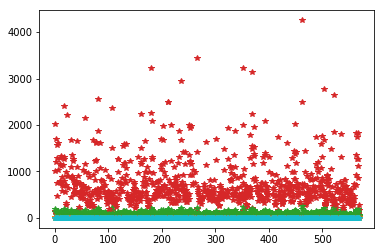

In [15]:
plt.plot(X_train,'*') 
plt.show()

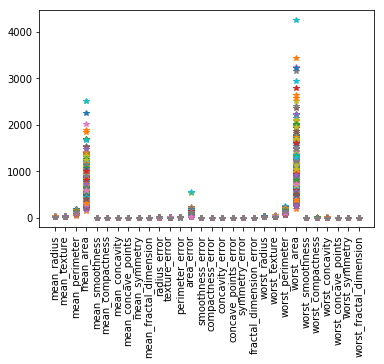

In [16]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

## Binarizing Data with lambda

In [17]:
mn = X['mean_area'].mean()
X_binar_train_3=X_train['mean_area'].map(lambda x: 1 if x>mn else 0)
X_binar_train_3.value_counts()


0    258
1    140
Name: mean_area, dtype: int64

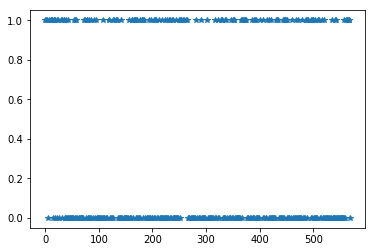

In [18]:
plt.plot(X_binar_train_3,'*')
plt.show()

## Binarizing Data With pandas inbuilt Function

In [19]:
X_binarized= X.apply(pd.cut,bins=2,labels=[1,0])

In [20]:
X_train_b, X_test_b,Y_train_b,Y_test_b=train_test_split(X_binarized,Y,test_size=0.3,stratify=Y,random_state=1)


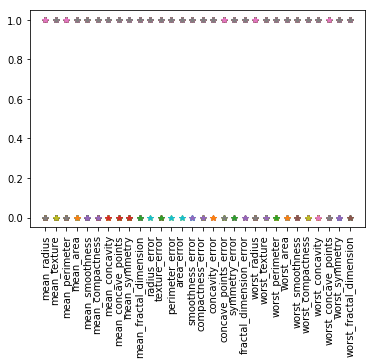

In [21]:
plt.plot(X_train_b.T,'*')
plt.xticks(rotation='vertical')
plt.show()

## Conversion of DataFrame as Numpy Array

In [22]:
X_train_b, X_test_b,Y_train_b,Y_test_b=X_train_b.values,X_test_b.values,Y_train_b.values,Y_test_b.values

# MP Neuron Practice

In [23]:
type(X_train_b)

numpy.ndarray

In [24]:
for b in range(X_train_b.shape[1]+1):
    
    Y_pred_train=[]
    accurate_rows=0
    for x, y in zip(X_train_b, Y_train_b):
        y_pred=(np.sum(x)>=b)
        Y_pred_train.append(y_pred)
        accurate_rows += y==y_pred
    print(b,int(accurate_rows),format(float(accurate_rows/X_train_b.shape[0]),"0.6"))
         
        

0 250 0.628141
1 250 0.628141
2 250 0.628141
3 250 0.628141
4 250 0.628141
5 250 0.628141
6 250 0.628141
7 250 0.628141
8 250 0.628141
9 250 0.628141
10 250 0.628141
11 250 0.628141
12 250 0.628141
13 251 0.630653
14 252 0.633166
15 254 0.638191
16 258 0.648241
17 262 0.658291
18 266 0.668342
19 268 0.673367
20 272 0.683417
21 278 0.698492
22 284 0.713568
23 289 0.726131
24 303 0.761307
25 320 0.80402
26 331 0.831658
27 340 0.854271
28 338 0.849246
29 328 0.824121
30 296 0.743719


# Test Accuracy

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
b=27
Y_pred_test=[]
for x in X_test_b:
    y_pred=(np.sum(x)>=b)
    Y_pred_test.append(y_pred)
acc=accuracy_score(Y_pred_test,Y_test)    
print(acc)

0.8538011695906432


# MP Neuron Class

In [27]:
class MPNeuron(object):
    def __init__(self):
        self.b=None
    
    def model(self,x):
        return (x.sum()>=self.b)
    
    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self,X,Y):
        accuracy={}
        for b in range(X.shape[1]+1):
            self.b=b
            Y_pred=self.predict(X)
            accuracy[b]=accuracy_score(Y_pred,Y)
        b_best=max(accuracy,key=accuracy.get)
        self.b=b_best
        return accuracy[self.b]

        

In [28]:
mdl = MPNeuron()
acc_test= mdl.fit(X_train_b,Y_train_b)
print(acc_test)

0.8542713567839196


In [29]:
acc_test = mdl.fit(X_test_b,Y_test_b)
print(acc_test)

0.8538011695906432


# Precepton

$y = 1,\mbox{if} \sum_i w_i x_i >= b$

$y = 0, \mbox{otherwise}$

In [45]:
class Preceptron(object):
    def __init__(self):
        self.b=None
        self.w=None
    
    def model(self,x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0
    
    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self,X,Y,epochs=1,lr=1):
        self.w=np.ones(X.shape[1])
        self.b=0
        acc={}
        wt_matrix=[]
        max_acc=0
        for e in range(epochs):
            for x,y in zip(X,Y):
                y_pred=self.model(x)
                if y-y_pred==1:
                    self.w=self.w+ lr * x
                    self.b=self.b-lr*1
                if y-y_pred==-1:
                    self.w=self.w-lr*x
                    self.b=self.b+lr*1
            acc[e]=self.get_accuracy(X,Y)
            wt_matrix.append(self.w)
            if acc[e]>max_acc:
                max_acc=acc[e]
                max_w=self.w
                max_b=self.b
            
            
        print("Accuracy Score",max_acc)
        
            
        plt.plot(acc.values())
        plt.ylim([0,1])
        plt.show()
        return np.array(wt_matrix)
                
                
    def get_accuracy(self,X,Y):
        if self.b is None and self.w is None:
            print("Model is not Defined Yet Call instance.fit(X,Y,epochs)")
        return accuracy_score(Y,self.predict(X))
        

In [46]:
if not (isinstance(X_train,np.ndarray) or isinstance(Y_train,np.ndarray) or isinstance(X_test,np.ndarray) or isinstance(Y_test,np.ndarray)):
    X_train=X_train.values
    Y_train=Y_train.values
    X_test=X_test.values
    Y_test=Y_test.values

Accuracy Score 0.9095477386934674


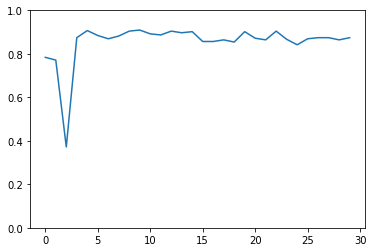

In [47]:
prcptron = Preceptron()
wt_matrix =prcptron.fit(X_train,Y_train,X_train.shape[1])
max_y_lim=wt_matrix.max()
min_y_lim = wt_matrix.min()
if max_y_lim>=0: 
    max_y_lim=max_y_lim+1000
else:
    max_y_lim=max_y_lim-1000

if min_y_lim>0: 
    min_y_lim=min_y_lim+1000
else:
    min_y_lim=min_y_lim-1000

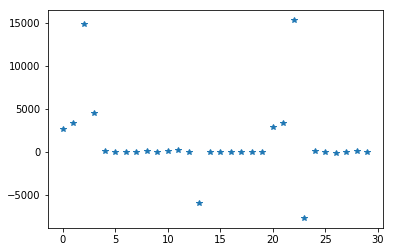

In [33]:
plt.plot(wt_matrix[-1,:], '*')
plt.show()

In [34]:
train_acc_score=prcptron.get_accuracy(X_train,Y_train)
print(train_acc_score)

0.8743718592964824


In [35]:
test_acc_score=prcptron.get_accuracy(X_test,Y_test)
print(test_acc_score)

0.9005847953216374


In [36]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

-8823.999999999944


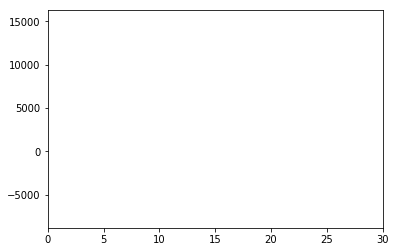

In [37]:
fig, ax = plt.subplots()

ax.set_xlim((0,X_test.shape[1]))
print(min_y_lim)
ax.set_ylim((min_y_lim, max_y_lim))

line, = ax.plot([], [], lw=2)


In [38]:
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)
anim = animation.FuncAnimation(fig, animate,
                               frames=X_train.shape[1], interval=200, 
                               blit=True)

HTML(anim.to_html5_video())
